In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [37]:
url = "https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view"
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
df = pd.read_csv(url)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [38]:
#напишіть функцію гіпотези лінійної регресії у векторному вигляді;
def hypothesis(w, X):
    h = np.dot(w, X)
    return h

In [39]:
#створіть функцію для обчислення функції втрат у векторному вигляді;
def mean_squared_error(w, X, y): 
    predictions = hypothesis(w, X) 
    squared_errors = (predictions - y) ** 2
    mean_squared = np.sum(squared_errors) / (2 * len(y)) 
    return mean_squared

In [40]:
#реалізуйте один крок градієнтного спуску;
def gradient_descent_step(w, X, y, learning_rate): 
    predictions = hypothesis(w, X)  
    errors = predictions - y
    gradient = np.dot(X.T, errors) / len(y) 
    w = w - learning_rate * gradient
    return w

Coefficients from sklearn: [3.78762754e+02 1.38604950e+06 4.06820034e+05]
Intercept from sklearn: -173171.60763263982


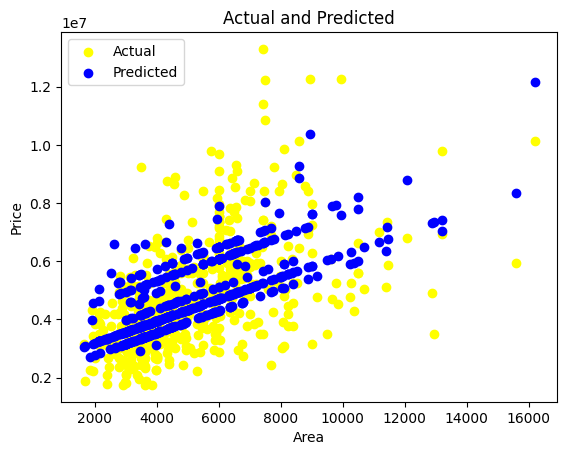

In [41]:
#знайдіть найкращі параметри вектора w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
features = ['area', 'bathrooms', 'bedrooms',]
target = 'price'
X = df[features]
y = df[target]

model = LinearRegression()
model.fit(X, y)
estimation = model.predict(X)

print(f"Coefficients from sklearn: {model.coef_}")
print(f"Intercept from sklearn: {model.intercept_}")

plt.scatter(X['area'], y, color='yellow', label='Actual')
plt.scatter(X['area'], estimation, color='blue', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual and Predicted')
plt.legend()
plt.show()


In [42]:
#знайдіть ці ж параметри за допомогою аналітичного рішення;
X = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'Coefficients from normal equation: {w[1:]}')
print(f'Intercept from normal equation: {w[0]}')

Coefficients from normal equation: [3.78762754e+02 1.38604950e+06 4.06820034e+05]
Intercept from normal equation: -173171.60763260847



Висновок: 
    Як ми можемо бачити з вищенаведених розрахунків, значення параметрів вектора w, знайдені за допомогою бібліотеки sklearn, збігаються зі значеннями, які були отримані в результаті реалізації аналітичного рішення.